In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
class LogisticRegression:
    def __init__(self, n_features):
        self.weights = np.random.randn(n_features, 1)
        self.bias = 0.
    
    def sigmoid(self, x):
        '''Numerically stable sigmoid function
        Taken from https://stackoverflow.com/a/64717799
        '''
        return np.piecewise(
            x,
            [x > 0],
            [lambda i: 1 / (1 + np.exp(-i)), lambda i: np.exp(i) / (1 + np.exp(i))],
        )
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        lin = x @ self.weights + self.bias
        return self.sigmoid(lin)
    
    def backward(self, x, y, y_hat):
        dw = (1 / len(x)) * (x.T @ (y_hat - y))
        db = (1 / len(x)) * np.sum(y_hat - y)
        return dw, db
    
    def optimize(self, dw, db, lr=1e-2):
        self.weights -= lr * dw
        self.bias -= lr * db

    def train(self, x, y):
        y_hat = self.forward(x)
        dw, db = self.backward(x, y, y_hat)
        self.optimize(dw, db)
    
    def accuracy(self, x, y):
        y_hat = self.forward(x)
        y_hat = (y_hat > 0.5).astype(int)
        acc = np.mean(y_hat == y)
        return acc

In [3]:
X, Y = make_classification(n_samples=1000, n_features=100)
Y = Y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

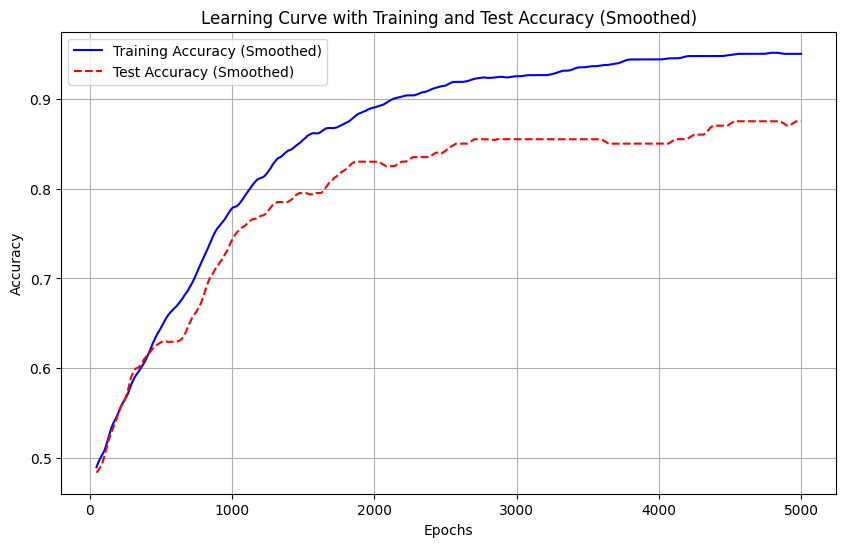

In [4]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

model = LogisticRegression(n_features=X_train.shape[1])

train_accuracies = []
test_accuracies = []

epochs = 5000
window_size = 50

for epoch in range(epochs):
    model.train(X_train, Y_train)
    
    acc_train = model.accuracy(X_train, Y_train)
    acc_test = model.accuracy(X_test, Y_test)

    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)

smoothed_train_acc = moving_average(train_accuracies, window_size)
smoothed_test_acc = moving_average(test_accuracies, window_size)

smoothed_epochs = range(window_size - 1, epochs)

plt.figure(figsize=(10, 6))
plt.plot(smoothed_epochs, smoothed_train_acc, label='Training Accuracy (Smoothed)', color='blue', linestyle='-')
plt.plot(smoothed_epochs, smoothed_test_acc, label='Test Accuracy (Smoothed)', color='red', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve with Training and Test Accuracy (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()